In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

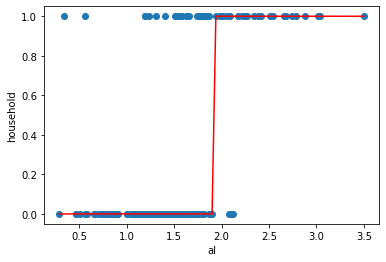

In [17]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [11]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

In [13]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [14]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [19]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [20]:
recall_score(y,pred)

0.5098039215686274

In [30]:
new_threshold = 0.6
pred = np.where(glass['household_pred_prob'] >= new_threshold,1,0)

In [31]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


In [29]:
accuracy_score(y_true=y, y_pred=pred)

0.8411214953271028

In [32]:
precision_score(y_true=y, y_pred=pred)

0.8695652173913043

In [33]:
recall_score(y,pred)

0.39215686274509803

In [34]:
new_threshold = 0.4
pred = np.where(glass['household_pred_prob'] >= new_threshold,1,0)

In [35]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


In [36]:
accuracy_score(y_true=y, y_pred=pred)

0.8785046728971962

In [37]:
precision_score(y_true=y, y_pred=pred)

0.8205128205128205

In [38]:
recall_score(y,pred)

0.6274509803921569

Text(0, 0.5, 'household')

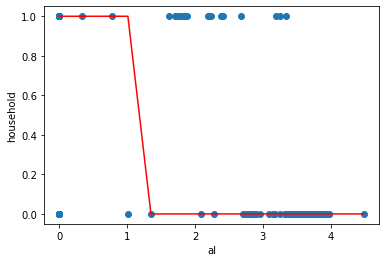

In [67]:
glass.sort_values( by = 'Mg', inplace=True)
X= np.array(glass.Mg).reshape(-1,1)
y = glass.household

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)

plt.scatter(glass.Mg, glass.household)
plt.plot(glass.Mg, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [68]:
logreg.predict_proba(X)[:15]
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [69]:
accuracy_score(y_true=y, y_pred=pred)

0.8785046728971962

In [70]:
precision_score(y_true=y, y_pred=pred)

0.7777777777777778

In [71]:
recall_score(y,pred)

0.6862745098039216

In [72]:
new_threshold = 0.4
pred = np.where(glass['household_pred_prob'] >= new_threshold,1,0)

In [73]:
accuracy_score(y_true=y, y_pred=pred)

0.8785046728971962

In [74]:
precision_score(y_true=y, y_pred=pred)

0.7659574468085106

In [75]:
recall_score(y,pred)

0.7058823529411765

In [76]:
new_threshold = 0.6
pred = np.where(glass['household_pred_prob'] >= new_threshold,1,0)

In [77]:
accuracy_score(y_true=y, y_pred=pred)

0.8785046728971962

In [78]:
precision_score(y_true=y, y_pred=pred)

0.7777777777777778

In [79]:
recall_score(y,pred)

0.6862745098039216

In [103]:
del glass["household_pred_prob"]

In [104]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household
106,1.53125,10.73,0.0,2.10,69.81,0.58,13.30,3.15,0.28,2,0
171,1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.00,0.00,5,1
169,1.51994,13.27,0.0,1.76,73.03,0.47,11.32,0.00,0.00,5,1
173,1.52043,13.38,0.0,1.40,72.25,0.33,12.50,0.00,0.00,5,1
205,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.00,7,1


In [107]:
y = glass['household']
X = glass.drop(columns=['household'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
num_cols = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]

In [111]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [112]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
174,0.722964,-0.645461,-0.754988,1.362997,-0.611140,0.348797,0.513864,0.165600,4.454912,5
180,-1.778975,1.398988,-0.664011,0.139366,2.465205,-0.732540,-1.009864,-0.333388,-0.599243,6
67,1.032822,-0.381661,0.672646,-1.161955,-0.429415,-0.462205,0.622186,-0.333388,1.085476,1
158,-0.206611,0.251458,0.504689,0.100521,-0.792865,0.092691,-0.143289,-0.333388,-0.599243,3
172,-1.706455,-0.447611,-1.881699,3.013926,-2.532233,8.103115,-1.486480,-0.333388,-0.599243,5
...,...,...,...,...,...,...,...,...,...,...
111,2.967786,-3.059230,-1.881699,-1.395027,0.557093,-0.732540,4.312351,-0.333388,-0.599243,2
73,-0.684583,0.000848,0.616661,0.197635,0.284505,0.135375,-0.793220,-0.333388,-0.599243,2
2,-0.727436,0.251458,0.602664,0.139366,0.440269,-0.177643,-0.872656,-0.333388,-0.599243,1
6,-0.315391,-0.051912,0.637655,-0.637542,0.570073,0.092691,-0.591019,-0.333388,-0.599243,1


In [119]:
reg=LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [120]:
reg.coef_

array([[-0.0088245 ,  0.02210135, -0.65125459,  0.61116115,  0.20307194,
         0.15760436,  0.25213866,  0.02891841, -0.05267569,  2.12726218]])

In [121]:
reg.intercept_

array([-9.36149522])